In [4]:
from itertools import cycle
import sys
from collections import Counter, defaultdict, namedtuple, deque
import numpy as np
from aocutils.visuals import plot


In [5]:
def p(taken):
    global curhigh
    grid = [[0 for _ in range(7)] for _ in range(65)]
    for r,c in taken:
        grid[curhigh-r][c] = 1
    plot(grid)

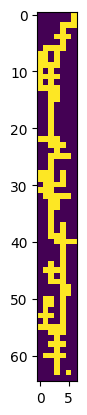

In [8]:
rock1 = ((0,0),(0,1),(0,2),(0,3))
rock2 = ((1,0),(1,1),(1,2),(0,1),(2,1))
rock3 = ((0,0),(0,1),(0,2),(1,2),(2,2))
rock4 = ((0,0),(1,0),(2,0),(3,0))
rock5 = ((0,0),(0,1),(1,0),(1,1))
rocks = cycle([rock1,rock2,rock3,rock4,rock5])

possible = lambda rock: all((r,c) not in taken and r > 0 and c in range(7) for r,c in rock)

def step(idx):
    global curhigh, taken, windidx
    rock = next(rocks)
    rock = [(r+curhigh+4, c +2) for r,c in rock]
    # print('newrock',rock)
    while True:
        # print('cur', rock)
        win = next(wind)
        windidx = (windidx+ 1) % len(w)
        if win == '>':
            newrock = [(r, c+1) for r,c in rock]
            if possible(newrock):
                rock = newrock
        else:
            newrock = [(r, c-1) for r,c in rock]
            if possible(newrock):
                rock = newrock
            
        # fall
        newrock = [(r-1, c) for r,c in rock]
        if possible(newrock):
            rock = newrock
        else:
            break
    # print('stop', rock)
    newhigh = curhigh
    for node in rock:
        taken.add(node)
    taken = {(r,c) for r,c in taken if r-curhigh >= -60} # for performance, was absolutely unnessary

    curhigh = max(curhigh, max(r for r,c in rock))
    newtop = []
    for c in range(7):
        newtop.append(max([r for r,c2 in taken if c==c2], default=0)-curhigh)
    toadd = (tuple(newtop), windidx, rockidx)
    if toadd in tops:
        # found repeat!
        prevhigh, previdx = tops[toadd]
        deltahigh = curhigh - prevhigh
        deltaidx = idx - previdx
        p(taken)
        return deltahigh, deltaidx, tops[toadd][1], tops[toadd][0]
    tops[toadd] = curhigh, idx

curhigh = 0
taken = set()
w = open("in.txt").read()
wind = cycle(w)
tops = {}

windidx = 0
rockidx = 0
for idx in range(1,211111111023):
    if res := step(idx):
        increase, mod, warmupidx, warmuphigh = res
        break
    # windidx =  (windidx+ 1) % len(w) # leave this here, took me 4 hours of debugging, should have increased every wind blow instead of every rock
    rockidx = (rockidx + 1) % 5

# necessary windidx and newtop

In [17]:
want = 1000000000000
amount, restcycles = divmod(want, mod)
res = warmuphigh + amount * increase
toadd = False
for high, idx in tops.values():
    if idx == restcycles:
        toadd = high-warmuphigh
        break
res + toadd == 1507692307690

True

In [1]:
# 4Hbq reddit
rocks, i = ((0,1,2,3),(1,0+1j,2+1j,1+2j),(0,1,2,2+1j,2+2j),(0,0+1j,0+2j,0+3j),(0,1,0+1j,1+1j)), 0
jets,  j = [ord(x)-61 for x in open('in.txt').read()], 0
tower, cache, h = set(), dict(), 0

empty = lambda p: p.real in range(7) and p.imag>0 and p not in tower
check = lambda p, d, rock: all(empty(p+d+r) for r in rock)

for n in range(int(1e12)):
    p = complex(2, h+4)                     # set start pos
    if n==2022: print(h)

    key = i, j                              # check for cycle
    if key in cache:
        N, H = cache[key]
        d, m = divmod(1e12-n, N-n)
        if not m: print(h + (H-h)*d); break
    else: cache[key] = n, h

    rock = rocks[i]                         # get next rock
    i = (i+1) % len(rocks)                  # and inc index

    while True:                                          
        jet = jets[j]                       # get next jet
        j = (j+1) % len(jets)               # and inc index

        if check(p, jet, rock): p += jet    # maybe move side
        if check(p, -1j, rock): p += -1j    # maybe move down
        else: break                         # can't move down

    tower |= {p+r for r in rock}            # add rock to tower
    h = max(h, p.imag+[1,0,2,2,3][i])       # compute new height

3055.0
1507692307690.0


In [2]:
jets

[1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 